<h3 style = 'color: red; text-align:center;'> Multi-Dimentional Scalling of MNIST data

<h3 style = 'color: blue;'> Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches
import math
import idx2numpy
from sklearn import metrics
%matplotlib inline

<h3 style = 'color: blue;'> Load the MNIST data 

(Traning and Testing data are already partitioned)

In [2]:
X_train = idx2numpy.convert_from_file('./data/train-images.idx3-ubyte')
y_train = idx2numpy.convert_from_file('./data/train-labels.idx1-ubyte')
X_test = idx2numpy.convert_from_file("./data/t10k-images.idx3-ubyte")
y_test = idx2numpy.convert_from_file("./data/t10k-labels.idx1-ubyte")

In [3]:
X_train = np.array([i.flatten() for i in X_train])
X_test = np.array([i.flatten() for i in X_test])

In [4]:
def size_print(x,y):
    print('Shape of {} is: {}'.format(y, x.shape))
size_print(X_train, 'Traning data')
size_print(X_test, 'Testing data')
size_print(y_train, 'Traning label')
size_print(y_test, 'Testing label')

Shape of Traning data is: (60000, 784)
Shape of Testing data is: (10000, 784)
Shape of Traning label is: (60000,)
Shape of Testing label is: (10000,)


<h3 style = 'color: blue;'> Calculate distance matrix 

In [5]:
dist_matrix = metrics.pairwise_distances(X_train[:10000],X_train[:10000], metric = "euclidean")

In [6]:
def cmds(dist_mat):
    # Input: Distance matrix and labels, Output:
    # Labels and n be the number of labels
    label = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    n = len(dist_mat)
    H = np.eye(n) - np.ones((n,n))/n
    B = -0.5 * H.dot(dist_mat**2).dot(H)
    # Determine the eigen values and eigen vectors
    eigen_values, eigen_vectors = np.linalg.eigh(B)
    # Sort the eigen values (decreasing order)
    idx = np.argsort(eigen_values)[::-1]
    eigen_values = eigen_values[idx]
    eigen_vectors = eigen_vectors[:,idx] 
    # First two components
    idx_2 = np.array([0,1])
    # Diagonal matrix with diagonals are square root of the first two eigen values
    dsqev = np.diag(np.sqrt(eigen_values[idx_2]))
    ev2 = eigen_vectors[:,idx_2]
    proj_mat_2D = np.dot(ev2,dsqev)
    return proj_mat_2D

<h3 style = 'color: blue;'> Projection matrix

In [7]:
proj_mat_2D = pd.DataFrame(cmds(dist_matrix), columns = ['x1', 'x2'])
proj_mat_2D['label'] = y_train[0:10000]
proj_mat_2D = proj_mat_2D.sort_values(by = ['label'])

In [19]:
digit = proj_mat_2D['label'].value_counts().index
count = proj_mat_2D['label'].value_counts()
pd.DataFrame([digit, count], index = ['digit', 'count'])

,0,1,2,3,4,5,6,7,8,9
digit,1,7,3,6,0,2,4,9,8,5
count,1127,1070,1032,1014,1001,991,980,978,944,863


<h3 style = 'color: blue;'> Plot the reduced dimention 

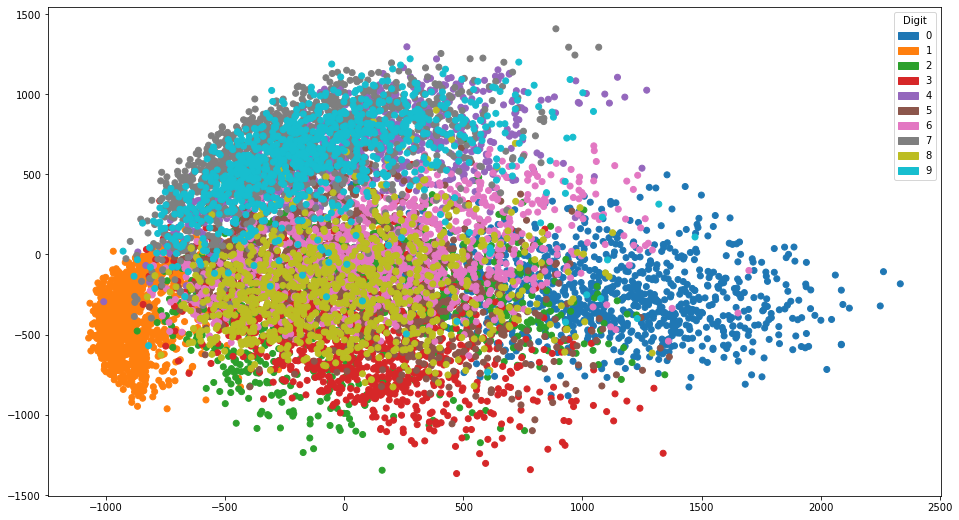

In [12]:
# Ploting
labels, categories = pd.factorize(proj_mat_2D['label'])
colors = [plt.cm.tab10(i) for i in labels]
handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(categories)]
plt.figure(figsize = (16,9))
plt.scatter(proj_mat_2D['x1'], proj_mat_2D['x2'], c = colors)
plt.legend(handles = handles, title = 'Digit')
plt.show()